In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy.stats import norm

%matplotlib inline

In [21]:
# # import data
# def get_data(stocks, start, end):
#     stockData = data.DataReader(stocks,'yahoo', start, end)
#     stockData = stockData['Close']
#     returns = stockData.pct_change()
#     meanReturns = returns.mean()
#     covMatrix = create_covar(stockData)
#     return meanReturns, covMatrix

# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)

# meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

In [2]:
def get_data(stocks, start, end):
    stockData = data.DataReader(stocks,'yahoo', start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stocks = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]
# stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

In [129]:
# def get_data(stocks, start_end, date_end):

tickers = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]

start_date = '2013-01-01'
end_date = '2017-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)
panel_data = panel_data['Adj Close']
returns = panel_data.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()

weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

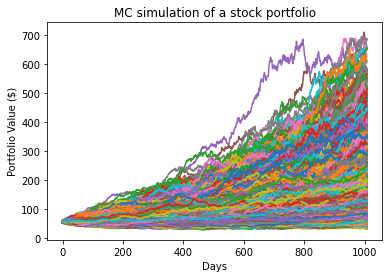

In [157]:
# Monte Carlo Method
mc_sims = 50000 # number of simulations
T = 1008 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 56.687794

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [158]:
df = pd.DataFrame(portfolio_sims)

In [159]:
df

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,56.637928,56.652648,56.823468,56.872349,56.569200,56.754433,56.910226,56.159757,55.955871,55.971104,...,56.358413,57.442765,56.214867,56.121362,56.196259,57.049148,56.824533,56.407452,55.936286,56.130311
1,57.307100,57.669880,56.285002,56.596886,55.440810,57.142011,56.883626,56.298447,56.706500,56.352953,...,56.660029,58.095165,55.585306,56.110768,56.327884,56.768948,56.905824,56.687680,56.583365,55.442637
2,58.229117,56.214181,56.881539,57.213638,54.976993,58.461282,56.866707,56.576598,57.082943,56.843423,...,57.188949,56.789928,55.239068,56.443809,55.953034,57.093654,58.073808,56.078214,56.062526,55.473776
3,58.419327,55.675973,56.362733,57.683340,54.632291,59.831766,56.973050,56.009445,57.730436,57.121037,...,57.549765,56.337801,54.992640,56.323271,56.823605,58.631427,59.395377,56.253163,56.405205,55.720650
4,59.546152,56.149057,58.023656,57.624108,55.123225,60.551202,56.517172,55.603443,57.608452,56.910974,...,58.060803,55.979669,54.905065,55.948479,57.300288,59.805552,58.640403,56.285655,55.729869,56.788759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,176.496687,167.255299,197.277641,136.286028,129.972699,198.085591,119.344401,86.748209,210.658608,203.853882,...,84.364055,140.881584,246.142431,150.304074,76.097807,148.274434,159.543170,113.183106,191.646904,126.866573
1004,177.484293,166.564068,200.222847,133.988220,127.387105,200.473848,119.011986,86.673862,211.191952,203.002084,...,84.548293,138.642151,247.265131,150.561235,76.254141,149.600353,156.551504,112.842866,190.782190,126.970255
1005,177.893841,168.433386,197.608409,134.600662,128.033248,200.373637,121.061608,87.381163,213.224429,203.994812,...,84.107390,140.547286,247.072439,152.093919,76.127190,150.620126,156.652126,112.384749,187.949530,128.821291
1006,180.732925,170.076642,202.594773,135.971444,126.381661,200.065953,122.363148,89.337987,213.297435,202.272362,...,84.059307,139.999894,249.795215,151.156535,75.045505,146.603438,159.541763,110.837255,193.458777,131.620717


In [160]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
1007,181.103418,170.718008,204.092318,134.724043,125.028855,196.558565,123.869648,88.806258,214.368814,200.953872,...,84.116119,139.334918,250.191917,147.771384,76.165048,144.934177,160.677525,109.294198,194.653782,129.700022


In [161]:
price = df.mean(axis=1)

In [162]:
return_series = (1 + price.pct_change()).cumprod() - 1

In [163]:
total_return = return_series.tail(1)

annualized_return = ((1 + total_return)**(1/5))-1

print(annualized_return*100)

1007    24.210846
dtype: float64


## Backtesting

In [164]:
tickers2 = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]

#change the date according to the year you want to backtest and compare with forecasted
start_date = '2017-01-02'
end_date = '2021-01-04'

panel_data2 = data.DataReader(tickers2,'yahoo', start_date, end_date)

In [165]:
panel_data2 = panel_data2['Adj Close']

In [166]:
panel_data2

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL
Date,,,,,,,,,
2017-01-03,27.297695,43.397999,58.065456,753.669983,28.542013,116.860001,41.939999,27.860001,56.687798
2017-01-04,27.267143,45.397999,57.805649,757.179993,28.465494,118.690002,42.000000,28.230000,56.922962
2017-01-05,27.405796,45.349998,57.805649,780.450012,28.704620,120.669998,41.119999,28.200001,56.250126
2017-01-06,27.711329,45.801998,58.306702,795.989990,29.699379,123.410004,40.709999,28.340000,56.243599
2017-01-09,27.965151,46.256001,58.121124,796.919983,29.412428,124.900002,40.290001,28.264999,55.936581
...,...,...,...,...,...,...,...,...,...
2020-12-28,135.679657,663.690002,222.629654,3283.959961,49.481781,277.000000,233.039993,126.720001,194.159698
2020-12-29,133.873077,665.989990,221.828033,3322.000000,50.092426,276.779999,221.369995,125.919998,193.382706
2020-12-30,132.731598,694.780029,219.383621,3285.850098,49.787102,271.869995,229.190002,126.540001,192.874649


## Portfolio Analysis

In [167]:
return_series2 = panel_data2.pct_change().dropna()
return_series2.head()

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL
Date,,,,,,,,,
2017-01-04,-0.001119,0.046085,-0.004474,0.004657,-0.002681,0.015660,0.001431,0.013281,0.004148
2017-01-05,0.005085,-0.001057,0.000000,0.030732,0.008401,0.016682,-0.020952,-0.001063,-0.011820
2017-01-06,0.011148,0.009967,0.008668,0.019912,0.034655,0.022707,-0.009971,0.004965,-0.000116
2017-01-09,0.009160,0.009912,-0.003183,0.001168,-0.009662,0.012074,-0.010317,-0.002646,-0.005459
2017-01-10,0.001008,-0.006097,-0.000319,-0.001280,-0.016260,-0.004404,0.012162,0.003184,0.012379


In [168]:
portfolio_weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

#apply the weights to returns
wt_portfolio = return_series2 * portfolio_weights
wt_portfolio.head()

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL
Date,,,,,,,,,
2017-01-04,-0.000123,0.004609,-0.000395,0.000460,-0.000449,0.002932,0.000205,0.000870,0.000164
2017-01-05,0.000560,-0.000106,0.000000,0.003036,0.001405,0.003123,-0.003002,-0.000070,-0.000467
2017-01-06,0.001227,0.000997,0.000765,0.001967,0.005798,0.004251,-0.001429,0.000325,-0.000005
2017-01-09,0.001008,0.000991,-0.000281,0.000115,-0.001616,0.002260,-0.001478,-0.000173,-0.000216
2017-01-10,0.000111,-0.000610,-0.000028,-0.000126,-0.002720,-0.000824,0.001743,0.000209,0.000489


In [169]:
portfolio_returns1 = wt_portfolio.sum(axis = 1)
portfolio_returns1.head()

Date
2017-01-04    0.008272
2017-01-05    0.004480
2017-01-06    0.013897
2017-01-09    0.000610
2017-01-10   -0.001758
dtype: float64

Start date,2017-01-04
End date,2021-01-04
Total months,47
,Backtest
Annual return,45.0%
Cumulative returns,341.0%
Annual volatility,24.6%
Sharpe ratio,1.63
Calmar ratio,1.42
Stability,0.86
Max drawdown,-31.6%


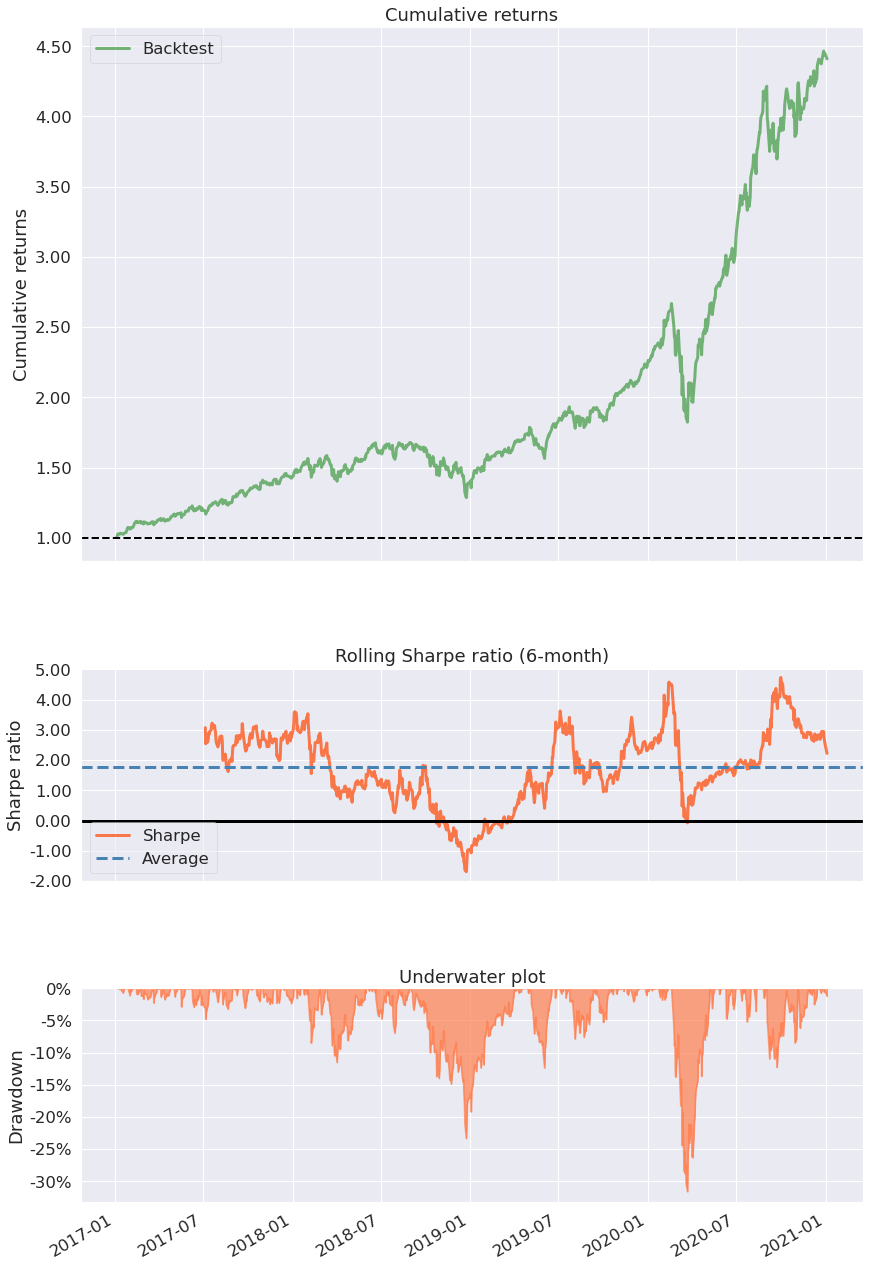

In [170]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio_returns1)

## Extra stuff

In [171]:
import itertools

In [172]:
weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

In [173]:
panel_data2 = panel_data2 * weights

In [174]:
num_cols = len(panel_data2.columns)
    
# Create a new column with the sums of all stocks named Total
panel_data2['Total'] = panel_data2.iloc[:, 0:num_cols].sum(axis=1)

In [175]:
#forecasted portfolio value
panel_data2

Symbols,AAPL,TSLA,MSFT,AMZN,EBAY,FB,GNRC,CPRT,ODFL,Total
Date,,,,,,,,,,
2017-01-03,3.005476,4.339800,5.127180,74.462594,4.775079,21.876192,6.010002,1.824830,2.239168,123.660321
2017-01-04,3.002112,4.539800,5.104239,74.809383,4.762277,22.218768,6.018600,1.849065,2.248457,124.552702
2017-01-05,3.017378,4.535000,5.104239,77.108461,4.802283,22.589424,5.892496,1.847100,2.221880,127.118261
2017-01-06,3.051017,4.580200,5.148482,78.643811,4.968706,23.102353,5.833743,1.856270,2.221622,129.406204
2017-01-09,3.078963,4.625600,5.132095,78.735694,4.920699,23.381280,5.773557,1.851357,2.209495,129.708742
...,...,...,...,...,...,...,...,...,...,...
2020-12-28,14.938330,66.369000,19.658198,324.455244,8.278302,51.854400,33.394631,8.300160,7.669308,534.917574
2020-12-29,14.739426,66.598999,19.587415,328.213600,8.380463,51.813216,31.722320,8.247760,7.638617,536.941816
2020-12-30,14.613749,69.478003,19.371574,324.641990,8.329382,50.894063,32.842927,8.288370,7.618549,536.078607


In [176]:
actual_portfolio_value = []

for value in panel_data2['Total']:
    actual_portfolio_value.append(value)

In [177]:
actual_portfolio_value

[123.66032099246979,
 124.55270202426911,
 127.11826050109863,
 129.4062036977768,
 129.70874174385068,
 129.50172739257812,
 130.2285599143982,
 131.72347354431153,
 132.17843882389067,
 131.21877258968354,
 131.13222770786285,
 131.3947618991852,
 131.34376371250153,
 132.67254260463713,
 133.58871168842313,
 135.5989506925583,
 136.34073918781283,
 136.1044378326416,
 135.09326339740755,
 134.23002147636413,
 135.71598078746794,
 135.9484547393799,
 133.25172429828643,
 133.35268515186308,
 133.94250678634643,
 135.29059890079498,
 135.85545781993866,
 136.65199798641206,
 137.95076639804842,
 137.51688886470797,
 138.25314761009216,
 138.13700572166442,
 138.30241503543851,
 139.6280249464035,
 139.88417898197176,
 138.9348386165619,
 138.2628935914993,
 138.69269255657198,
 138.02029824523925,
 139.59224231586458,
 138.83054450092314,
 139.00110158519743,
 138.69658866004946,
 138.47735556812287,
 138.88876028461456,
 139.06986307621,
 139.18164982967377,
 139.595995035553,
 139.3

In [178]:
len(actual_portfolio_value)

1008

In [179]:
forecasted_portfolio_value = []

for value in price:
    forecasted_portfolio_value.append(value)

In [180]:
forecasted_portfolio_value

[56.75197994799161,
 56.816102768471445,
 56.88042383367824,
 56.938228841450645,
 56.99985504637378,
 57.05898559205368,
 57.116404485300976,
 57.17482800387145,
 57.23457630413931,
 57.28917429720037,
 57.35576571086545,
 57.41549061294212,
 57.480519849294026,
 57.54177559981808,
 57.61205105056786,
 57.67684563505421,
 57.736610240460664,
 57.79772122051498,
 57.86031034631307,
 57.920211160531736,
 57.98392377996138,
 58.04890285505971,
 58.114860218929415,
 58.17054309159202,
 58.2318354474751,
 58.294773855160734,
 58.35424355784483,
 58.42234174016747,
 58.4868183634924,
 58.55002487266246,
 58.61218017209884,
 58.67263735562475,
 58.73904427409569,
 58.799546646818555,
 58.86000234993009,
 58.927274911511255,
 58.993166784579095,
 59.05824423779354,
 59.12009398932617,
 59.18758624665597,
 59.25057950722464,
 59.31583811411215,
 59.37889656486744,
 59.440017009654085,
 59.50157355090919,
 59.56245540580679,
 59.62644570288304,
 59.688949427624,
 59.74974224444903,
 59.81531814

In [181]:
len(forecasted_portfolio_value)

1008

## Calculate MAPE of forecasted period

In [182]:
# Define the dataset as python lists
# actual = [136, 120, 138, 155, 149]
# forecast = [134, 124, 132, 141, 149]

# Consider a list APE to store the
# APE value for each of the records in dataset
APE = []

# Iterate over the list values
for day in range(253):

	# Calculate percentage error
	per_err = (actual_portfolio_value[day] - forecasted_portfolio_value[day]) / actual_portfolio_value[day]

	# Take absolute value of
	# the percentage error (APE)
	per_err = abs(per_err)

	# Append it to the APE list
	APE.append(per_err)

# Calculate the MAPE
MAPE = sum(APE)/len(APE)

# Print the MAPE value and percentage
print(f'''
MAPE : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE : 0.59
MAPE % : 58.53 %



## Mean Squared Error

In [183]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(sqrt(mean_squared_error(actual_portfolio_value, forecasted_portfolio_value)))

178.22402913758725


In [13]:
df.loc[1007].max()

131562.9651025735

In [15]:
df.iloc[1007][df.iloc[1007]==df.loc[1007].max()]

945    131562.965103
Name: 1007, dtype: float64

In [16]:
df.loc[945]

0       17733.492946
1       19034.008657
2       22140.910795
3       16719.462997
4       18264.114311
            ...     
9995    19903.058984
9996    42072.938048
9997    36897.356857
9998    18262.675437
9999    27061.930583
Name: 945, Length: 10000, dtype: float64

In [11]:
percentagelist = []

for i in range(0,6000):
    initial = df[i].iloc[0]
    end = df[i].iloc[251]
    change = ((end-initial)/initial)*100
    percentagelist.append(change)

In [12]:
percentagelist

[32.19600133566015,
 22.25625546880794,
 49.462214331614085,
 17.291258982093243,
 6.84623110628758,
 35.87942930523032,
 -6.174114490826545,
 63.37612356837764,
 23.282334143797087,
 -2.645879582917292,
 39.14640138991459,
 18.50514313316889,
 22.368358146294586,
 25.050795901675176,
 49.92607450395202,
 35.268671092963146,
 2.929711946876573,
 26.672404552540048,
 31.285371222664605,
 49.88203212671673,
 38.108759725666374,
 33.49932220862457,
 28.14882013978216,
 48.071394323787324,
 -9.729629886913033,
 33.55223172680864,
 14.656517991975937,
 23.105185234961965,
 41.92601929308128,
 11.873391915610313,
 35.67803890632686,
 18.80144244831414,
 28.469769021423474,
 41.515648276049085,
 15.184199316386271,
 42.511034446705445,
 18.590233037633197,
 15.882545125597607,
 23.461144865035685,
 -4.431768941487721,
 58.232043756054374,
 25.436275182703156,
 45.78448353102867,
 10.327578384145536,
 56.45650030473579,
 20.922200056057587,
 29.115457331309795,
 29.12462826392277,
 20.66202354

In [13]:
max(percentagelist)

138.288239269455

In [14]:
min(percentagelist)

-36.572126441417346

In [15]:
total = 0
for n in percentagelist:
    total += n
    
avg = total/10000

avg

16.500070196254445

In [16]:
tickers = ["AAPL", "TSLA", 'MSFT', 'AMZN', 'EBAY', 'FB', "GNRC", "CPRT", "ODFL"]

start_date = '2020-01-01'
end_date = '2021-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)

weights = [0.1101,0.1,0.0883,0.0988,0.1673,0.1872,0.1433,0.0655,0.0395]

return_series_adj = (panel_data['Adj Close'].pct_change()+ 1).cumprod() - 1

weighted_return_series_test = weights * (return_series_adj)
#Sum the weighted returns for SPY and TLT
return_series_test = weighted_return_series_test.sum(axis=1) #add up the returns from the 2 ETFs

#Plot the weighted returns and individual returns on the same plot for comparison
# fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(return_series_test, label = 'weight_SPY_TLT')

# return_series_adj_spy_tlt.plot(figsize=(16,9))
# ax.plot(return_series_adj['AAPL'] , label = 'SPY')
# ax.plot(return_series_adj['MSFT'] , label = 'TLT')
# ax.plot(return_series_adj['AMZN'] , label = 'TLT')
# ax.plot(return_series_adj['TSLA'] , label = 'TSLA')
# ax.legend()

In [17]:
test_returns = return_series_test.tail(1)
print("Portfolio Return:", test_returns[-1].round(3))

Portfolio Return: 0.459


In [18]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
251,13076.119119,12082.491424,15164.447021,11622.302381,10670.432261,13675.983901,9446.250121,16295.348349,12271.210357,9623.604069,...,16508.282007,10424.360943,14412.21422,17576.503366,15052.903281,10570.535804,14274.92601,12545.583363,9151.448209,9784.956114


In [19]:
df.iloc[251].mean()

12762.135098610808